In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Crop_recommendation.csv", delimiter=',')

print("Preview data:\n", df.head())
print("\nTipe data tiap kolom:\n", df.dtypes)
print("\nJumlah data kosong per kolom:\n", df.isnull().sum())

Preview data:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Tipe data tiap kolom:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Jumlah data kosong per kolom:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [2]:
cols_to_clean = ['temperature', 'humidity', 'ph', 'rainfall']
for col in cols_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).astype(float)

In [3]:
X = df.drop('label', axis=1)
y = df['label']

In [4]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print("\n--- BASELINE MODEL WITHOUT SCALING ---")
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train_unscaled, y_train)


--- BASELINE MODEL WITHOUT SCALING ---


RandomForestClassifier(random_state=42)

In [6]:
y_train_pred_baseline = baseline_model.predict(X_train_unscaled)
train_accuracy_baseline = accuracy_score(y_train, y_train_pred_baseline)
print("Akurasi Training (tanpa scaling):", round(train_accuracy_baseline, 4))

y_test_pred_baseline = baseline_model.predict(X_test_unscaled)
test_accuracy_baseline = accuracy_score(y_test, y_test_pred_baseline)
print("Akurasi Testing (tanpa scaling):", round(test_accuracy_baseline, 4))


Akurasi Training (tanpa scaling): 1.0
Akurasi Testing (tanpa scaling): 1.0


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)


In [ ]:
print("\n--- MODEL WITH SCALING ---")
scaled_model = RandomForestClassifier(n_estimators=100, random_state=42)
scaled_model.fit(X_train_scaled, y_train)

y_train_pred_scaled = scaled_model.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)
print("Akurasi Training (dengan scaling):", round(train_accuracy_scaled, 4))

y_test_pred_scaled = scaled_model.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)
print("Akurasi Testing (dengan scaling):", round(test_accuracy_scaled, 4))



--- MODEL WITH SCALING ---
Akurasi Training (dengan scaling): 1.0
Akurasi Testing (dengan scaling): 1.0


In [ ]:
print("\n--- COMPLEX MODEL ---")
complex_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,   
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
complex_model.fit(X_train_scaled, y_train)

y_train_pred_complex = complex_model.predict(X_train_scaled)
train_accuracy_complex = accuracy_score(y_train, y_train_pred_complex)
print("Akurasi Training (model kompleks):", round(train_accuracy_complex, 4))

y_test_pred_complex = complex_model.predict(X_test_scaled)
test_accuracy_complex = accuracy_score(y_test, y_test_pred_complex)
print("Akurasi Testing (model kompleks):", round(test_accuracy_complex, 4))



--- COMPLEX MODEL ---
Akurasi Training (model kompleks): 1.0
Akurasi Testing (model kompleks): 1.0


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt



--- ANALYZING LEARNING CURVES ---


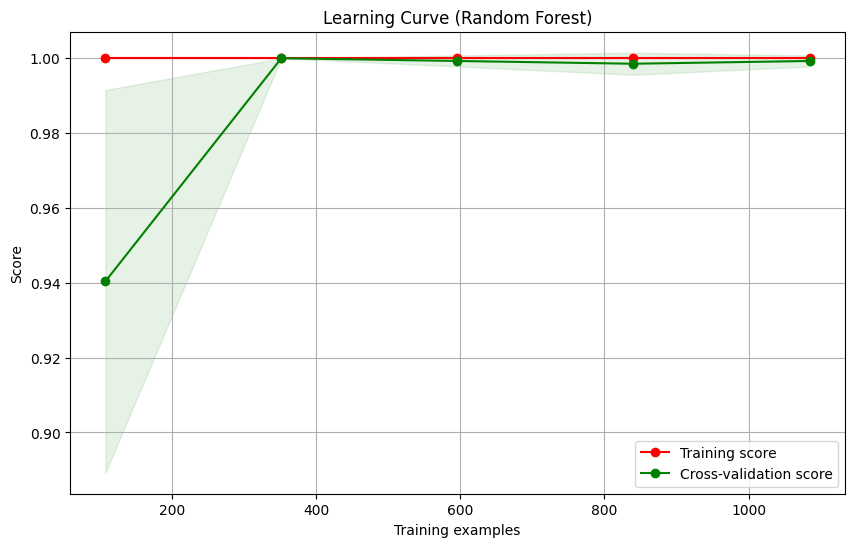

In [ ]:
print("\n--- ANALYZING LEARNING CURVES ---")
plot_learning_curve(
    complex_model, 
    "Learning Curve (Random Forest)", 
    X_train_scaled, 
    y_train, 
    cv=5
)
plt.show()

In [ ]:
print("\n--- COMPREHENSIVE HYPERPARAMETER TUNING ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


--- COMPREHENSIVE HYPERPARAMETER TUNING ---
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
print("\n--- EVALUATING BEST MODEL ---")
y_train_pred_best = best_model.predict(X_train_scaled)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
print("Akurasi Training (model terbaik):", round(train_accuracy_best, 4))
y_test_pred_best = best_model.predict(X_test_scaled)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
print("Akurasi Testing (model terbaik):", round(test_accuracy_best, 4))


--- EVALUATING BEST MODEL ---
Akurasi Training (model terbaik): 1.0
Akurasi Testing (model terbaik): 1.0


Selisih Akurasi: 0.0
Model Balance antara training dan testing


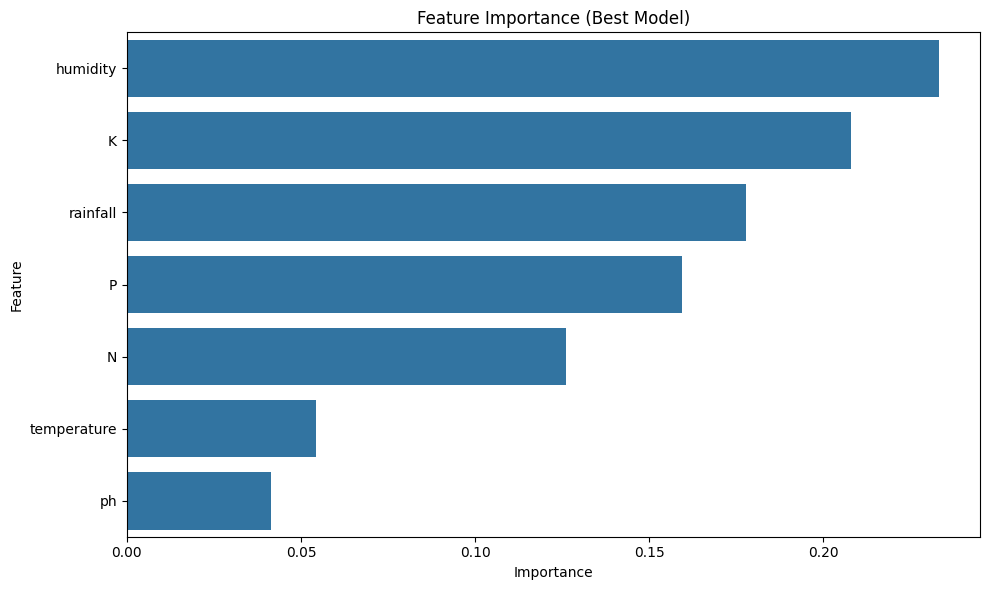


Feature Importance:
       Feature  Importance
4     humidity    0.233287
2            K    0.207819
6     rainfall    0.177722
1            P    0.159414
0            N    0.126068
3  temperature    0.054423
5           ph    0.041266

Laporan klasifikasi (model terbaik):
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        25
       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        25
       beans       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        23
     cowpeas       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        16
        peas       1.0

In [ ]:

selisih = abs(train_accuracy_best - test_accuracy_best)
print("Selisih Akurasi:", round(selisih, 4))

if train_accuracy_best > 0.98 and test_accuracy_best < 0.90:
    print("Model kemungkinan Overfitting")
elif train_accuracy_best < 0.80 and test_accuracy_best < 0.80:
    print("Model kemungkinan Underfitting")
else:
    print("Model Balance antara training dan testing")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Best Model)')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

print("\nLaporan klasifikasi (model terbaik):")
print(classification_report(y_test, y_test_pred_best))

import joblib
joblib.dump(best_model, 'crop_recommendation_best_rf_model.pkl')
joblib.dump(scaler, 'crop_recommendation_scaler.pkl')

print("\nModel terbaik dan scaler telah disimpan ke file.")

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    data_baru = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])
    
    scaled_data = scaler.transform(data_baru)
    
    hasil_prediksi = best_model.predict(scaled_data)
    probabilities = best_model.predict_proba(scaled_data)
    
    num_crops = min(3, len(best_model.classes_))
    top_indices = np.argsort(probabilities[0])[::-1][:num_crops]
    top_crops = [(best_model.classes_[i], probabilities[0][i]) for i in top_indices]
    
    return hasil_prediksi[0], top_crops

hasil_prediksi, top_crops = predict_crop(
    N=90, P=42, K=43, 
    temperature=20.87, humidity=82.00, 
    ph=6.50, rainfall=20.29
)

print("\n--- Hasil Prediksi dengan Model Terbaik ---")
print(f"Rekomendasi Tanaman: {hasil_prediksi}")
print("\nTop 3 Kemungkinan Tanaman:")
for crop, prob in top_crops:
    print(f"- {crop}: {prob:.4f} ({prob*100:.1f}%)")